## 6.4.2 Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\christina.savva\Documents\Data Immersion 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned', 'listings_cleaned_final_6.3.csv'))

## 6.4.2. Clean your data so that it’s ready for analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        3723 non-null   int64  
 1   id                                3723 non-null   int64  
 2   name                              3723 non-null   object 
 3   summary                           3457 non-null   object 
 4   host_id                           3723 non-null   int64  
 5   host_since                        3723 non-null   object 
 6   host_is_superhost                 3723 non-null   object 
 7   host_listings_count               3723 non-null   int64  
 8   host_has_profile_pic              3723 non-null   object 
 9   host_identity_verified            3723 non-null   object 
 10  street                            3723 non-null   object 
 11  neighbourhood_cleansed            3723 non-null   object 
 12  city  

In [6]:
# Drop column that is not required

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head(5)

,id,name,summary,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,...,reviews_per_month,review_scores_rating_new,review_scores_accuracy_new,review_scores_cleanliness_new,review_scores_checkin_new,review_scores_communication_new,review_scores_location_new,review_scores_value_new,reviews_per_month_category,price_range
0,7087327,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,15830506,2014-05-21,f,26,t,t,"3rd Street Southeast, Washington, DC 20003, Un...",...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0150-0200
1,975833,Spacious Capitol Hill Townhouse,NaN,5338703,2013-03-05,f,1,t,f,"11th Street Southeast, Washington, DC 20003, U...",...,2.11,94.0,10.0,9.0,10.0,10.0,9.0,9.0,Medium,0350-0500
2,8249488,Spacious/private room for single,This is an ideal room for a single traveler th...,1487418,2011-12-09,f,2,t,t,"14th Place, Hyattsville, MD 20782, United States",...,1.00,95.0,10.0,10.0,10.0,10.0,10.0,10.0,Medium,0050-0075
3,8409022,A wonderful bedroom with library,Prime location right on the Potomac River in W...,16970249,2014-06-18,f,1,t,f,"O St, Washington, DC 20024, United States",...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0075-0100
4,8411173,Downtown Silver Spring,"Hi travellers! I live in this peaceful spot, b...",30369828,2015-03-31,f,1,t,t,"East-West Highway, Silver Spring, MD 20910, Un...",...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0050-0075


In [8]:
df.shape

(3723, 51)

In [9]:
# Check for missing values

df.isnull().sum()

# All missing values have been filled with N/A in the previous task

id                                    0
name                                  0
summary                             266
host_id                               0
host_since                            0
host_is_superhost                     0
host_listings_count                   0
host_has_profile_pic                  0
host_identity_verified                0
street                                0
neighbourhood_cleansed                0
city                                  0
state                                 0
zipcode                               9
smart_location                        0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         1
room_type                             0
accommodates                          0
bed_type                              0
price                                 0
security_deposit                      0
cleaning_fee                          0


In [14]:
# Replace missing values for summary, zipcode and property_type columns with N/A

df['summary'].fillna('N/A', inplace=True)
df['zipcode'].fillna('N/A', inplace=True)
df['property_type'].fillna('N/A', inplace=True)

In [16]:
# Check that missing values have been replaced

df.isnull().sum()

id                                  0
name                                0
summary                             0
host_id                             0
host_since                          0
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
street                              0
neighbourhood_cleansed              0
city                                0
state                               0
zipcode                             0
smart_location                      0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bed_type                            0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people

In [17]:
#  Duplicates check

dups = df.duplicated()

In [18]:
dups.shape # No dups

(3723,)

In [23]:
# Checking value counts for review_scores_rating to see how many entries have '0' (no reviews yet)
# These need to be removed from the DF for the analysis

df['review_scores_rating_new'].value_counts()

0.0      830
100.0    777
95.0     237
96.0     191
93.0     190
97.0     187
98.0     171
90.0     171
80.0     145
94.0     121
92.0     104
99.0      89
91.0      79
88.0      64
87.0      63
89.0      50
85.0      40
86.0      34
84.0      33
83.0      32
60.0      23
82.0      14
73.0      10
81.0       8
70.0       7
75.0       7
77.0       6
78.0       6
79.0       6
76.0       5
40.0       5
65.0       3
74.0       2
50.0       2
72.0       2
67.0       2
30.0       2
53.0       1
68.0       1
58.0       1
57.0       1
55.0       1
Name: review_scores_rating_new, dtype: int64

In [26]:
# Checking value counts for price to see if there are any entries with '0'

df['price'].value_counts().sort_index(ascending=True)

10      1
20      2
23      2
25      3
28      2
       ..
1300    1
1400    1
1500    1
2000    4
2822    1
Name: price, Length: 284, dtype: int64

C:\Users\christina.savva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

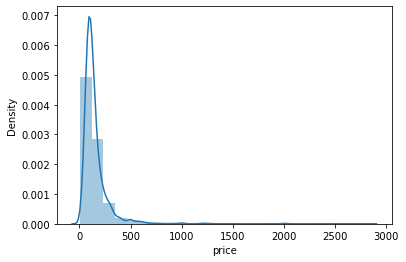

In [27]:
# Checking for extreme values

sns.distplot(df['price'], bins=25)

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [28]:
# Display summary statistics for price and review_scores_rating

df[['price', 'review_scores_rating_new']].describe()

,price,review_scores_rating_new
count,3723.000000,3723.000000
mean,149.165995,72.614021
std,140.110699,39.490809
min,10.000000,0.000000
25%,85.000000,80.000000
50%,115.000000,93.000000
75%,165.000000,98.000000
max,2822.000000,100.000000


In [29]:
# Check the price median

df['price'].median()

115.0

In [30]:
# Check the review_scores_rating median

df['review_scores_rating_new'].median()

93.0

## 6.4.4 Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

In [33]:
# Create a subset of the DF excluding the listings that do not have any reviews yet

df_reviews = df[df['review_scores_rating_new'] >0]

In [34]:
df_reviews.shape

(2893, 51)

In [35]:
3723-2893

830

In [36]:
# Checking that only '0' entries were removed

df_reviews['review_scores_rating_new'].value_counts()

100.0    777
95.0     237
96.0     191
93.0     190
97.0     187
90.0     171
98.0     171
80.0     145
94.0     121
92.0     104
99.0      89
91.0      79
88.0      64
87.0      63
89.0      50
85.0      40
86.0      34
84.0      33
83.0      32
60.0      23
82.0      14
73.0      10
81.0       8
70.0       7
75.0       7
77.0       6
78.0       6
79.0       6
76.0       5
40.0       5
65.0       3
74.0       2
50.0       2
72.0       2
67.0       2
30.0       2
53.0       1
68.0       1
58.0       1
57.0       1
55.0       1
Name: review_scores_rating_new, dtype: int64

In [38]:
# Running revised summary statistics

df_reviews[['price', 'review_scores_rating_new']].describe()

# This, among other things, removed the high prices with the max price now USD1200 (vs. USD2822 before)
# Also changed min for review_scores_rating_new from 0 to 30 (as expected)

,price,review_scores_rating_new
count,2893.000000,2893.000000
mean,134.289319,93.446941
std,86.458828,7.723952
min,20.000000,30.000000
25%,85.000000,90.000000
50%,110.000000,95.000000
75%,150.000000,100.000000
max,1200.000000,100.000000


In [39]:
# Check new price median (decreased by USD5)

df_reviews['price'].median()

110.0

In [40]:
# Check new review_scores_rating median (increased by 2)

df_reviews['review_scores_rating_new'].median() 

95.0

C:\Users\christina.savva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

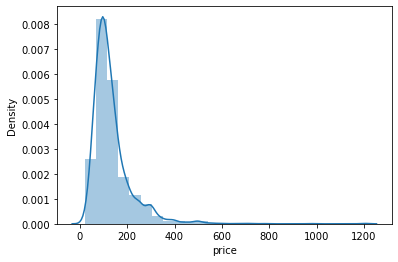

In [45]:
# Checking for extreme values once more

sns.distplot(df_reviews['price'], bins=25)

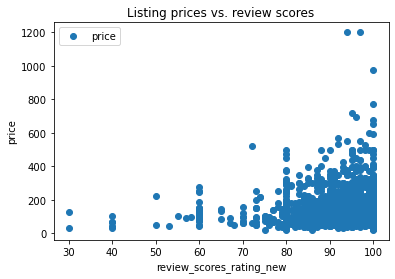

In [53]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_reviews.plot(x = 'review_scores_rating_new', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Listing prices vs. review scores')  
plt.xlabel('review_scores_rating_new')  
plt.ylabel('price')  
plt.show()

## 6.4.5 State your hypothesis in a markdown cell within your Jupyter notebook.

If reviews are poor, then prices tend to be lower.

## 6.4.6 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_reviews['review_scores_rating_new'].values.reshape(-1,1)
y = df_reviews['price'].values.reshape(-1,1)

In [47]:
X

array([[ 94.],
       [ 95.],
       [100.],
       ...,
       [ 94.],
       [ 96.],
       [100.]])

In [48]:
y

array([[350],
       [ 50],
       [ 38],
       ...,
       [275],
       [179],
       [110]], dtype=int64)

## 6.4.7 Split the data into two sets: a training set and a test set.

In [49]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 6.4.8 Run a linear regression on the data. First, fit the model you created to the training set. Then, create a prediction for y on the test set.

In [50]:
# Create a regression object, which will be fit onto the training set

regression = LinearRegression()

In [51]:
# Fit the regression model onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the values of y using X (on the test set)

y_predicted = regression.predict(X_test)

## 6.4.9 Create a plot that shows the regression line on the test set.

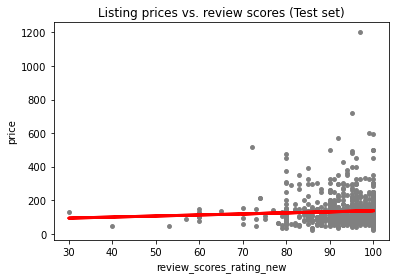

In [55]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Listing prices vs. review scores (Test set)')
plot_test.xlabel('review_scores_rating_new')
plot_test.ylabel('price')
plot_test.show()

## 6.4.10 Write your own interpretation of how well the line appears to fit the data in a markdown cell.

I think the line fits very well as there is no spike in prices for listings with higher review scores. There is a high concentration of lower priced listings at high review scores.

## 6.4.11 Check the model performance statistics—MSE and R2

In [56]:
# Create model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [57]:
# Print the model summary statistics to evaluate the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.62537425]]
Mean squared error:  8339.506039943128
R2 score:  0.00023807931384423053


## 6.4.12 Compare the predicted y values with the actual y values in a dataframe.

In [58]:
y_predicted

array([[118.92899696],
       [133.31260461],
       [137.69022433],
       [137.69022433],
       [137.69022433],
       [125.18273941],
       [137.69022433],
       [134.5633531 ],
       [133.93797885],
       [133.93797885],
       [123.93199092],
       [132.68723036],
       [137.69022433],
       [137.69022433],
       [137.69022433],
       [130.18573338],
       [128.93498489],
       [134.5633531 ],
       [137.06485008],
       [125.18273941],
       [136.43947584],
       [134.5633531 ],
       [137.69022433],
       [133.93797885],
       [135.18872735],
       [137.69022433],
       [134.5633531 ],
       [132.06185612],
       [132.06185612],
       [134.5633531 ],
       [137.69022433],
       [134.5633531 ],
       [134.5633531 ],
       [135.18872735],
       [134.5633531 ],
       [131.43648187],
       [136.43947584],
       [137.69022433],
       [131.43648187],
       [137.06485008],
       [124.55736517],
       [133.31260461],
       [133.31260461],
       [137

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

DF_actual_y_predicted_y = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
DF_actual_y_predicted_y.head(30)

,Actual,Predicted
0,95,118.928997
1,50,133.312605
2,79,137.690224
3,170,137.690224
4,80,137.690224
5,199,125.182739
6,98,137.690224
7,139,134.563353
8,58,133.937979
9,79,133.937979


## 6.4.13 Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

Looking at the variances in the comparison above and the model summary statistics, I don't think that this model performs very well predicting the price for listings based on reviews. The MSE is very large at 8339 and the R2 score is very low at 0.0002, meaning a regression may not be the best model to represent this data.